Linear (in x) model

$ $$y^p$$ = m $$x$$ + b $, results in the following error

$e(m, b)=\sum_{i=0}^{n-1} ($$y^t_i$$ -m $$x_i$$ -b)^2$ <br>


Non-linear (in x) model

$ $$y^p$$ = r $$x^3$$ + s $$x^2$$  + m $$x$$ +b $, results in the following loss

$e(r, s, m, b)=\sum_{i=0}^{n-1} ($$y^t_i$$ -r \space $$x^3_i$$ -s \space $$x^2_i$$ -m \space $$x_i$$ -b)^2$ <br>


$r, s, m$ and $b$ are constants. Superscript integers represent powers (exponentiation).

Note that $ $$y^p$$ $ is still $\underline {linear} $ in $r, s, m$ and $b$.

$\frac{\partial e}{\partial m}$ <br>


= $\frac {\partial } {\partial m} ( \sum_{i=0}^{n-1} (y^t_i  -r \space $$x^3_i$$ -s \space $$x^2_i$$ -m \space $$x_i$$ -b)^2 ) $


$ = \sum_{i=0}^{n-1} \frac {\partial (y^t_i -r \space x^3_i -s \space x^2_i -m \space x_i -b)^2 } {\partial m} $ <br>

$ = \sum_{i=0}^{n-1} 2(y^t_i -r \space x^3_i -s \space x^2_i -m \space x_i -b) \frac {\partial (y^t_i -r \space x^3_i -s \space x^2_i -m \space x_i -b) } {\partial m} $ <br>


$ = \sum_{i=0}^{n-1} 2(y^t_i -r \space x^3_i -s \space x^2_i -m \space x_i -b) (-x_i) $ <br>

$ = -2 \sum_{i=0}^{n-1}e_ix_i$

where $ e_i = (y^t_i -r \space x^3_i -s \space x^2_i -m \space x_i -b)$. Using the bar notation, where bar means average,

$\frac{1}{n} \frac{\partial e}{\partial m} = -2 \overline {ex} $. &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  &emsp; &emsp;  &nbsp; $(1)$<br>

Similarly, we can derive

$\frac{1}{n} \frac{\partial e}{\partial b} = -2 \overline {e} $, &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  &emsp; &emsp;  &emsp; $(2)$

$\frac{1}{n} \frac{\partial e}{\partial r} = -2 \overline {ex^3} $, &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  &emsp; &emsp;  $(3)$

and

$\frac{1}{n} \frac{\partial e}{\partial s} = -2 \overline {ex^2} $. &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp;  &emsp; &emsp;  $(4)$


Assume initial values for $m, b, r$ and $s$. Then iterate using,

$m = m - C \frac{\partial e}{\partial m}$

$b = b - C \frac{\partial e}{\partial b}$

$r = r - C \frac{\partial e}{\partial r}$

$s = s - C \frac{\partial e}{\partial s}$

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import math
from torch import nn
from torch import Tensor

In [2]:
x, y = np.loadtxt('data.txt')
xS = 12*x-6
print(xS.min(), xS.max())
df = pd.DataFrame({"x": x, "y_true": y})
noise = np.random.normal(0, 0.05, len(df))
df['y_true'] = 2*df['x']*df['x']*df['x'] + 0.5*df['x'] + 5 + noise
df['x3'] = df['x']*df['x']*df['x']
df['x2'] = df['x']*df['x']
df['x0'] = np.ones(len(df))
df['xS'] = xS
yt_min = df.y_true.min()
yt_range = df.y_true.max() - yt_min
df['y_true'] = (df['y_true'] - yt_min)/yt_range
print(df.y_true.min(), df.y_true.max())

-5.675305481334444 5.563812220118603
0.0 1.0


In [3]:
# tx = torch.tensor(df[['x3','x2','x', 'x0']].to_numpy())
#tx = torch.tensor(df[['xS', 'x0']].to_numpy())
tx = torch.tensor(df[['x']].to_numpy())
y_true = torch.tensor(df['y_true'].to_numpy(), dtype=torch.float).unsqueeze(1)

In [4]:
C=0.1

In [5]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.lin = nn.Sequential(
            nn.Linear(1, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input: Tensor) -> Tensor:
        input = input.float()
        return self.lin(input)


In [6]:
# def loss_fn(y_pred, y_true):
#     e = y_pred - y_true
#     return (e*e).mean()
loss_fn = nn.MSELoss()

In [7]:
#print('pm before: ', pm1, pm2)
y_pred = None
loss = None
lm = LinearModel()
#lm = lm.double()
optimizer = torch.optim.SGD(lm.parameters(), lr=C)
for p in lm.parameters():
    print('pm before: ', p, p.grad)
for iter in range(5001):
    #y_pred = forward(tx, pm1, pm2)
    y_pred = lm(tx)
    loss = loss_fn(y_pred, y_true)
    if iter%500 == 0:
        print('iter, loss: ', iter, loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#print('pm after: ', pm1, pm2)
for p in lm.parameters():
    print('pm after: ', p, p.grad)
print('loss after: ', loss)

pm before:  Parameter containing:
tensor([[0.4328],
        [0.3475],
        [0.9688],
        [0.5333]], requires_grad=True) None
pm before:  Parameter containing:
tensor([0.7166, 0.6123, 0.4462, 0.1741], requires_grad=True) None
pm before:  Parameter containing:
tensor([[-0.4380, -0.2316,  0.2196,  0.3195],
        [ 0.0466,  0.3804,  0.1302,  0.0289],
        [-0.1480,  0.4782, -0.1461, -0.1505],
        [-0.0431, -0.1077,  0.3316,  0.3111]], requires_grad=True) None
pm before:  Parameter containing:
tensor([ 0.4676, -0.1799,  0.1378, -0.1362], requires_grad=True) None
pm before:  Parameter containing:
tensor([[ 0.3147,  0.0425, -0.4035,  0.0337]], requires_grad=True) None
pm before:  Parameter containing:
tensor([0.1380], requires_grad=True) None
iter, loss:  0 tensor(0.1365, grad_fn=<MseLossBackward0>)
iter, loss:  500 tensor(0.0107, grad_fn=<MseLossBackward0>)
iter, loss:  1000 tensor(0.0023, grad_fn=<MseLossBackward0>)
iter, loss:  1500 tensor(0.0021, grad_fn=<MseLossBackward0>

In [8]:
df['y_pred'] = y_pred.detach().numpy()

<AxesSubplot: xlabel='x'>

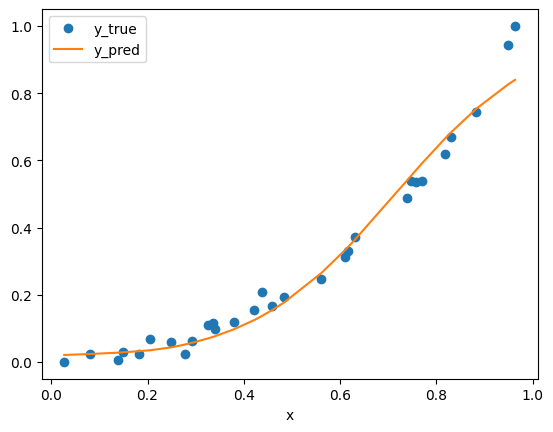

In [9]:
df.sort_values('x').plot(x="x", y=["y_true", "y_pred"], style=['o','-'])

# Project 3

## Description:
To analyze and categorize tweets, a technique called Bag-of-Words (BoW) can be used to convert the tweets into numerical features. The process involves first cleaning and preparing the tweets by breaking them down into individual words and creating a vocabulary of all the unique words. Then, each tweet is represented as a feature vector using the BoW model, which counts the frequency of each word in the vocabulary and assigns it a numerical value. This allows for easier analysis and categorization of the tweets based on their content.

In [28]:
pip install pandas gensim scikit-learn torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Implementation:
This code is implementing a simple neural network for sentiment classification of tweets using cross-validation. The steps can be summarized as follows:

1) Import necessary libraries: pandas, gensim, scikit-learn, and torch are imported for data handling, word embeddings, splitting the data, and neural network implementation, respectively.

2) Load and preprocess data: The tweet texts and corresponding sentiment labels are loaded from online sources and combined into a single DataFrame.

3) Tokenize tweets and create Word2Vec model: The tweets are tokenized, and a Word2Vec model is trained on these tokens.

4) Define a function to convert tweets into embeddings: This function takes a tweet and the trained Word2Vec model as inputs and returns an averaged word embedding for the tweet.

5) Convert tweets into embeddings: Each tweet in the dataset is converted into an averaged word embedding using the Word2Vec model.

6) Create a custom dataset class for the tweet embeddings and sentiment labels.

7) Define a neural network model: A simple feedforward neural network is defined with an input layer, a hidden layer with 128 units and ReLU activation, and an output layer with 3 units representing the 3 sentiment classes.

8) Define training and evaluation functions: These functions train the neural network model using the provided data and evaluate its performance by calculating a confusion matrix.

9) Perform cross-validation: The data is split into 5 folds using KFold cross-validation, and for each fold, the model is trained on the training set and evaluated on the test set. The confusion matrix, accuracy, and F1 score are calculated and printed for each fold.

10) Train and evaluate the model for each fold: For each fold, the model is trained for 50 epochs using a learning rate of 1e-4 and batch size of 16. The performance of the model is then evaluated on the test set, and the confusion matrix, accuracy, and F1 score are printed.

The purpose of this code is to build and evaluate a simple neural network model for sentiment classification of tweets using word embeddings and cross-validation.

In [29]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix

First we will load the data and preprocess it:

In [30]:
# Load and preprocess data
import pandas as pd
import requests

# Load tweet texts
text_url = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/train_text.txt"
response = requests.get(text_url)
texts = [line.strip() for line in response.text.split('\n') if line.strip()]

# Load sentiment labels
label_url = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/train_labels.txt"
response = requests.get(label_url)
labels = [int(line.strip()) for line in response.text.split('\n') if line.strip()]

# Combine texts and labels into a single DataFrame
data = {'sentiment': labels, 'TweetText': texts}
df = pd.DataFrame(data)

#df = df[['sentiment', 'TweetText']]
#label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
#df['sentiment'] = df['sentiment'].apply(lambda x: label_map[x])

Next, we will create the Bag-of-Words representation of the tweets using CountVectorizer from sklearn:

In [31]:
# Tokenize tweets and create Word2Vec model
tweets = [t.split() for t in df['TweetText']]
word2vec_model = Word2Vec(sentences=tweets, vector_size=100, window=5, min_count=1, workers=4)

def tweet_to_embedding(tweet, word2vec_model):
    tokens = tweet.split()
    embeddings = [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv]
    if not embeddings:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(embeddings, axis=0)

X = np.array([tweet_to_embedding(tweet, word2vec_model) for tweet in df['TweetText']])
y = df['sentiment'].values

Now, we will create the custom dataset class and DataLoader:

In [32]:
# Custom Dataset
class TweetDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x_sample = self.X[idx]
        y_sample = self.y[idx]
        return x_sample, y_sample

Lets define the neural network model for classification:

In [33]:
# Neural network model
class ClassifierModel(nn.Module):
    def __init__(self, input_size):
        super(ClassifierModel, self).__init__()
        self.lin = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 3),
        )

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        return self.lin(input)

Finally, we will train the classifier using the DataLoader:

In [34]:
# Training and evaluation
def train(model, data_loader, loss_fn, optimizer, device):
    model.train()
    for x_batch, y_batch in data_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [35]:
def evaluate(model, data_loader, device):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for x_batch, y_batch in data_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            output = model(x_batch)
            _, predicted = torch.max(output, 1)
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    return confusion_matrix(y_true, y_pred)

In [36]:
# Cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    train_dataset = TweetDataset(X_train, y_train)
    test_dataset = TweetDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    input_size = word2vec_model.vector_size
    model = ClassifierModel(input_size).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    num_epochs = 50
    for epoch in range(num_epochs):
        train(model, train_loader, loss_fn, optimizer, device)

    y_true = y_test
    y_pred = []
    for _, batch in enumerate(test_loader):
        inputs, _ = batch
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
    
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)

    print(f"Fold {fold+1}/{num_folds} confusion matrix:")
    print(cm)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()


Fold 1/5 confusion matrix:
[[  40  948  440]
 [  33 2842 1267]
 [  21 1453 2079]]
Accuracy: 0.5438
F1 Score: 0.5039

Fold 2/5 confusion matrix:
[[  62  984  383]
 [  48 2989 1048]
 [  20 1708 1881]]
Accuracy: 0.5406
F1 Score: 0.5016

Fold 3/5 confusion matrix:
[[  79 1021  335]
 [  68 3175  865]
 [  52 1885 1643]]
Accuracy: 0.5368
F1 Score: 0.4966

Fold 4/5 confusion matrix:
[[  58 1100  243]
 [  69 3356  734]
 [  39 2045 1479]]
Accuracy: 0.5363
F1 Score: 0.4903

Fold 5/5 confusion matrix:
[[  48  869  483]
 [  42 2809 1328]
 [  25 1478 2041]]
Accuracy: 0.5369
F1 Score: 0.4998



## Output :
This output shows a breakdown of the performance of a machine learning model for sentiment classification. The model was trained on a dataset divided into five parts, with each part being used as a test set once while the other four were used as training sets. The confusion matrix for each fold shows how well the model performed in predicting the sentiment of the test data, comparing its predictions with the actual sentiment labels. The three sentiment categories used were negative, neutral, and positive. Overall, the confusion matrix helps evaluate the model's accuracy, precision, and recall for each sentiment class. 
The table above shows the comparison between the actual and predicted class labels, where each row represents the true class and each column represents the predicted class.

For example, in the first fold, the output confusion matrix interprets the following: 
    a) 40 negative tweets were correctly classified, 948 were misclassified as neutral, and 440 as positive.
    b) 33 neutral tweets were misclassified as negative, 2842 were correctly classified, and 1267 were misclassified as positive.
    c) 21 positive tweets were misclassified as negative, 1453 were misclassified as neutral, and 2079 were correctly classified.
A high number of correct predictions along the diagonal of the confusion matrix and low numbers in the off-diagonal elements indicate a good classifier. The current confusion matrices show that the model seems to perform well for class 1 (neutral) but has a more challenging time with class 0 (negative) and class 2 (positive).

Accuracy: 0.5438
The accuracy is the ratio of the correctly classified instances to the total instances in the test set. An accuracy of 0.5438 means that 54.38% of the instances in the test set were correctly classified by the model in the first fold.

F1 Score: 0.5039
The F1 score is the harmonic mean of precision and recall, and it is a measure that takes both false positives and false negatives into account. The F1 score ranges from 0 to 1, with 1 being the best possible score. An F1 score of 0.5039 indicates that the model has moderate performance in balancing precision and recall for this specific fold.


## Conclusion:
This method involves utilizing a basic Bag-of-Words model to convert the tweets into numerical features, and implementing a neural network for classification. The Bag-of-Words model involves representing each tweet as a frequency count of the words in the vocabulary, while the neural network analyzes these numerical features to classify the tweets into predefined categories. By combining these two techniques, the model can effectively analyze and categorize tweets based on their content.
The performance of the model depends on the performance of all the folds. The model's performance is slightly better than random guessing for a three-class classification problem. It shows that the model has some predictive ability, but there is significant room for improvement. It is essential to look into possible improvements to the model, such as using a more sophisticated architecture, better pre-processing of the input data, or leveraging additional features to enhance the performance of the model. 